In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
! pwd

/home/willbanny/code/willbanny/Location-Analysis/carehome_api


In [4]:
df = pd.read_csv("../raw_data/croydon_golden_with_labels.csv")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411 entries, 0 to 410
Columns: 130 entries, Unnamed: 0 to Robust_Labels
dtypes: float64(21), int64(101), object(8)
memory usage: 417.5+ KB


In [61]:
df["MinMax_Labels"].value_counts()

MinMax_Labels
0    212
2    109
1     90
Name: count, dtype: int64

In [40]:
cols_df = pd.DataFrame(df.dtypes[df.dtypes != "object"]).T
cols_list = cols_df.reset_index().columns

In [44]:
cols_list = cols_list[1:]
cols_list_short = cols_list[:7]

averages = df[cols_list].groupby(['Robust_Labels']).mean()
averages

,hospital_250,train_station_250,bus_station_250,park_250,place_of_worship_250,liquor_store_250,hospital_500,train_station_500,bus_station_500,park_500,...,Outdoors_Sub_domain_Rank__where_1_is_most_deprived_,Outdoors_Sub_domain_Decile__where_1_is_most_deprived_10__of_LSOAs_,Total_population__mid_2015__excluding_prisoners_,Dependent_Children_aged_0_15__mid_2015__excluding_prisoners_,Population_aged_16_59__mid_2015__excluding_prisoners_,Older_population_aged_60_and_over__mid_2015__excluding_prisoners_,Working_age_population_18_59_64__for_use_with_Employment_Deprivation_Domain__excluding_prisoners__,longitude,latitude,MinMax_Labels
Robust_Labels,,,,,,,,,,,,,,,,,,,,,
0,0.250000,0.062500,0.187500,0.312500,0.875000,0.000000,0.375000,0.312500,0.312500,0.812500,...,3242.187500,1.250000,2336.437500,557.500000,1550.937500,228.000000,1550.937500,-0.097184,51.379317,1.937500
1,0.000000,0.042424,0.012121,0.006061,0.096970,0.000000,0.000000,0.066667,0.024242,0.072727,...,7571.690909,2.787879,1720.757576,423.848485,1037.157576,259.751515,1022.006061,-0.080872,51.370822,1.490909
2,0.013043,0.017391,0.000000,0.060870,0.017391,0.004348,0.013043,0.039130,0.004348,0.104348,...,10516.269565,3.704348,1612.382609,291.734783,899.043478,421.604348,903.421739,-0.090871,51.342157,0.134783


In [6]:
#obtain angles
angles=np.linspace(0,2*np.pi,6, endpoint=False)
print(angles)

[0.         1.04719755 2.0943951  3.14159265 4.1887902  5.23598776]


In [47]:
small_df = averages[cols_list_short]
small_df.T

Robust_Labels,0,1,2
hospital_250,0.2500,0.000000,0.013043
train_station_250,0.0625,0.042424,0.017391
bus_station_250,0.1875,0.012121,0.000000
park_250,0.3125,0.006061,0.060870
place_of_worship_250,0.8750,0.096970,0.017391
liquor_store_250,0.0000,0.000000,0.004348
hospital_500,0.3750,0.000000,0.013043


In [7]:

angles=np.concatenate((angles,[angles[0]]))
angles

array([0.        , 1.04719755, 2.0943951 , 3.14159265, 4.1887902 ,
       5.23598776, 0.        ])

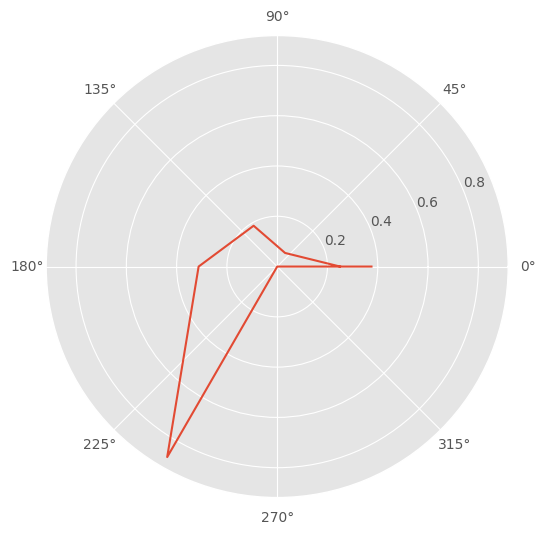

In [48]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)
ax.plot(angles, small_df.T[0])
plt.show()

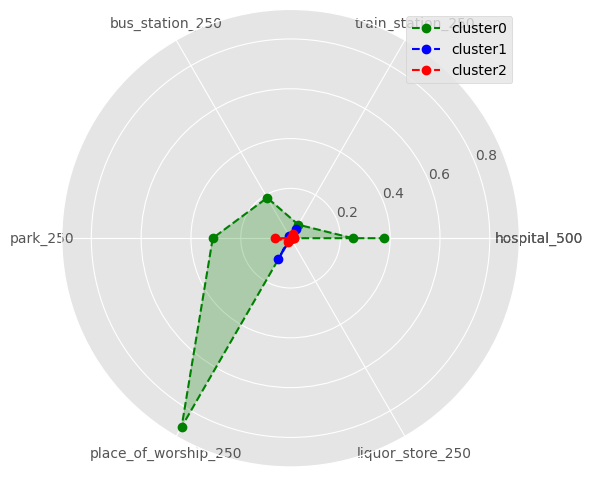

In [54]:
fig=plt.figure(figsize=(6,6))
ax=fig.add_subplot(polar=True)
#basic plot
ax.plot(angles,small_df.T[0], 'o--', color='g', label='cluster0')
#fill plot
ax.fill(angles, small_df.T[0], alpha=0.25, color='g')


ax.plot(angles,small_df.T[1], 'o--', color='b', label='cluster1')
#fill plot
ax.fill(angles, small_df.T[1], alpha=0.25, color='b')


ax.plot(angles,small_df.T[2], 'o--', color='r', label='cluster2')
#fill plot
ax.fill(angles, small_df.T[2], alpha=0.25, color='r')


#Add labels
ax.set_thetagrids(angles * 180/np.pi, small_df.T[0].index)
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()